In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import os
import requests as re
import json

import lib_sean

In [2]:
# read

root_dir = '\\'.join( os.getcwd().split('\\')[:-1])
data_dir = root_dir + '\\' + 'Data\\'

df = pd.read_excel(data_dir + 'property_data.xlsx')

In [3]:
print(
    df.shape
)

(102598, 19)


In [4]:
# check missing vals

sr_colwise_na_sum = df.apply(
        axis=0, func= lambda col: sum(col.isna())
    ).sort_values(ascending = False)

sr_colwise_na_sum = sr_colwise_na_sum[sr_colwise_na_sum > 0]
sr_colwise_na_sum

HOUSE_RULES            52131
LAST_REVIEW            15893
REVIEWS_PER_MONTH      15879
MINIMUM_NIGHTS           409
HOST_NAME                406
CONSTRUCTION_YEAR        213
NUMBER_OF_REVIEWS        183
CANCELLATION_POLICY       76
NYC_BOROUGH               24
NEIGHBORHOOD              16
LONGITUDE                  7
LATITUDE                   7
dtype: int64

<AxesSubplot:ylabel='REVIEWS_PER_MONTH'>

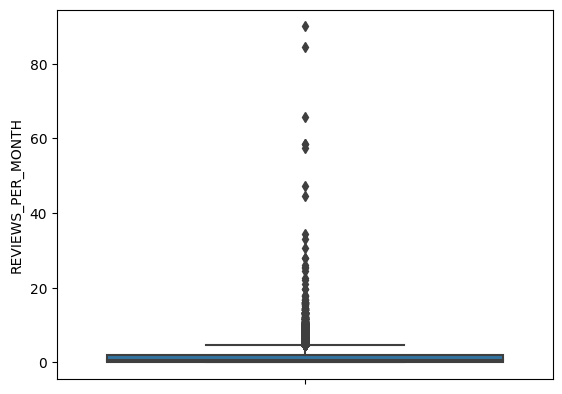

In [5]:
df.REVIEWS_PER_MONTH.describe()
sns.boxplot(y = df.REVIEWS_PER_MONTH)

In [6]:
df.CANCELLATION_POLICY.value_counts()

moderate    34343
strict      34105
flexible    34074
Name: CANCELLATION_POLICY, dtype: int64

In [7]:
df_rev_geocoding = pd.read_excel(data_dir + 'rev_geocoding.xlsx')

In [8]:
df_rev_geocoding.apply(axis=0, func= lambda c : c.isna().sum())

coordinate         0
full_address       0
zipcode          193
property_name      0
dtype: int64

In [9]:
df_joined = lib_sean.join_geo_info(df, df_rev_geocoding)

In [10]:
df_joined.apply(lambda c: c.isna().sum()).sort_values(ascending = False)

HOUSE_RULES            52129
LAST_REVIEW            15892
REVIEWS_PER_MONTH      15878
MINIMUM_NIGHTS           409
HOST_NAME                406
zipcode                  312
CONSTRUCTION_YEAR        213
NUMBER_OF_REVIEWS        183
CANCELLATION_POLICY       76
NYC_BOROUGH               24
NEIGHBORHOOD              16
full_address               0
coordinate                 0
ID                         0
SERVICE_FEE                0
PRICE                      0
NAME                       0
ROOM_TYPE                  0
INSTANT_BOOKABLE           0
LONGITUDE                  0
LATITUDE                   0
HOST_ID                    0
property_name              0
dtype: int64

In [19]:
df_joined.NEIGHBORHOOD.value_counts(ascending= False)[:20]

Bedford-Stuyvesant    7937
Williamsburg          7775
Harlem                5466
Bushwick              4982
Hell's Kitchen        3965
Upper West Side       3859
Upper East Side       3680
East Village          3491
Midtown               3390
Crown Heights         3261
East Harlem           2341
Chelsea               2285
Greenpoint            2141
Lower East Side       1948
Astoria               1876
Washington Heights    1779
Financial District    1490
West Village          1483
Flatbush              1295
East Flatbush         1211
Name: NEIGHBORHOOD, dtype: int64

In [12]:
df_joined.columns

Index(['ID', 'NAME', 'HOST_ID', 'HOST_NAME', 'NYC_BOROUGH', 'NEIGHBORHOOD',
       'LATITUDE', 'LONGITUDE', 'INSTANT_BOOKABLE', 'CANCELLATION_POLICY',
       'ROOM_TYPE', 'CONSTRUCTION_YEAR', 'PRICE', 'SERVICE_FEE',
       'MINIMUM_NIGHTS', 'NUMBER_OF_REVIEWS', 'LAST_REVIEW',
       'REVIEWS_PER_MONTH', 'HOUSE_RULES', 'coordinate', 'full_address',
       'zipcode', 'property_name'],
      dtype='object')

In [13]:
# the full market value could be used for estimating property price
df_nys = pd.read_json(data_dir + 'newyorkstate_data.json')
df_nys.columns

Index(['roll_year', 'county_name', 'municipality_code', 'municipality_name',
       'school_district_code', 'school_district_name', 'swis_code',
       'tax_class', 'roll_section', 'property_class',
       'property_class_description', 'print_key_code', 'parcel_address_number',
       'parcel_address_street', 'parcel_address_suff', 'front', 'depth',
       'grid_coordinates_east', 'grid_coordinates_north',
       'primary_owner_first_name', 'primary_owner_last_name',
       'additional_owner_1_first', 'additional_owner_1_last_name',
       'mailing_address_number', 'mailing_address_street',
       'mailing_address_suff', 'mailing_address_city', 'mailing_address_state',
       'mailing_address_zip', 'full_market_value', 'assessment_land',
       'assessment_total', 'county_taxable_value', 'town_taxable_value',
       'school_taxable', 'deed_book', 'page', 'bank', 'additional_owner_1_mi',
       'additional_owner_1_suffix', 'exemption_code_1',
       'exemption_application_number', 'exem

In [14]:
df_cny = pd.read_json(data_dir + 'cityofnewyork_data.json')
df_cny.columns

Index(['parid', 'boro', 'block', 'lot', 'rectype', 'year', 'secvol',
       'pymktland', 'pymkttot', 'pyactland', 'pyacttot', 'pyactextot',
       'pytrnland', 'pytrntot', 'pytrnextot', 'pytxbtot', 'pytxbextot',
       'pytaxclass', 'tenmktland', 'tenmkttot', 'tenactland', 'tenacttot'],
      dtype='object')

In [20]:
df_joined.groupby(by = 'NEIGHBORHOOD').agg(
    'mean'
)['PRICE']

KeyError: 'price'

In [21]:
df_joined.columns

Index(['ID', 'NAME', 'HOST_ID', 'HOST_NAME', 'NYC_BOROUGH', 'NEIGHBORHOOD',
       'LATITUDE', 'LONGITUDE', 'INSTANT_BOOKABLE', 'CANCELLATION_POLICY',
       'ROOM_TYPE', 'CONSTRUCTION_YEAR', 'PRICE', 'SERVICE_FEE',
       'MINIMUM_NIGHTS', 'NUMBER_OF_REVIEWS', 'LAST_REVIEW',
       'REVIEWS_PER_MONTH', 'HOUSE_RULES', 'coordinate', 'full_address',
       'zipcode', 'property_name'],
      dtype='object')